## ADMISSION PREDICTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error 
from sklearn.preprocessing import LabelEncoder, RobustScaler,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn. tree import DecisionTreeRegressor
from sklearn. ensemble import GradientBoostingRegressor,RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import LinearSVR

In [2]:
df=pd.read_csv('Admission_Predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [5]:
df.drop(columns='Serial No.', inplace=True)

In [6]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.shape

(400, 8)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [10]:
df.isnull().mean()*100

GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

In [11]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

## UNIVARIATE ANALYSIS

### HISTPLOT

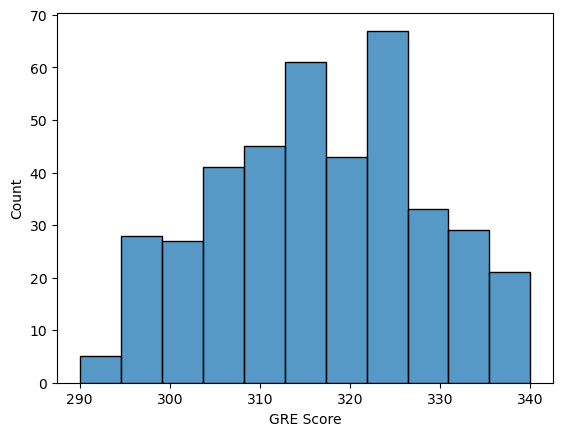

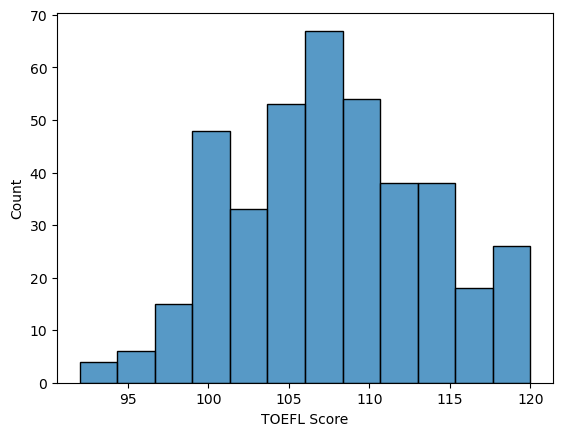

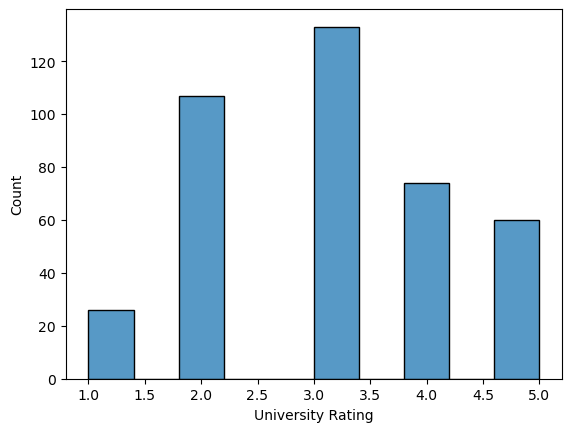

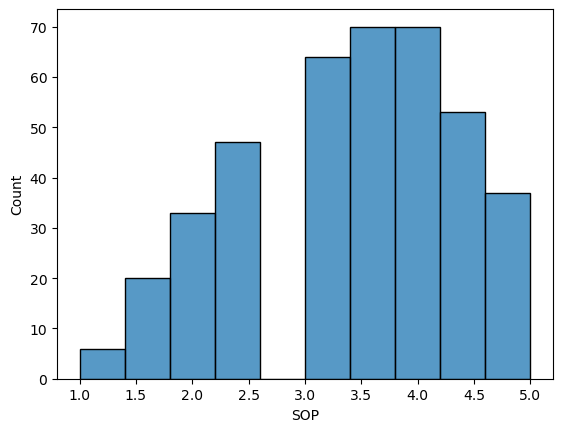

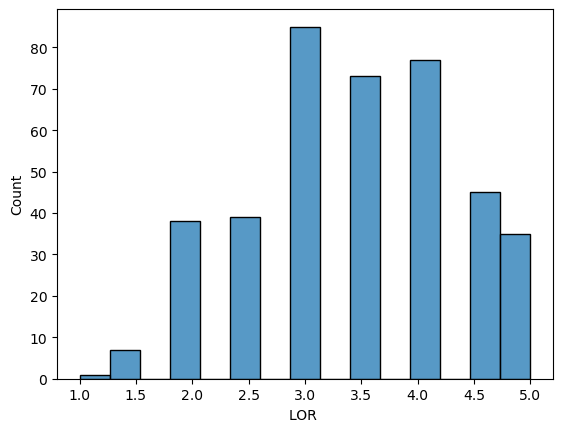

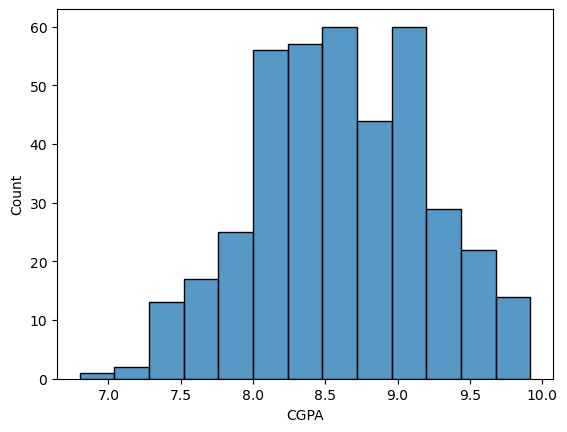

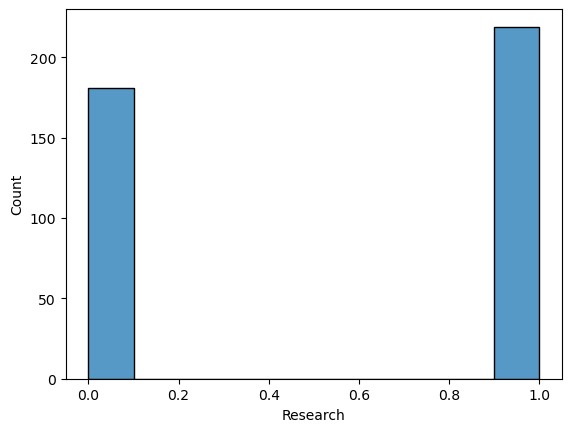

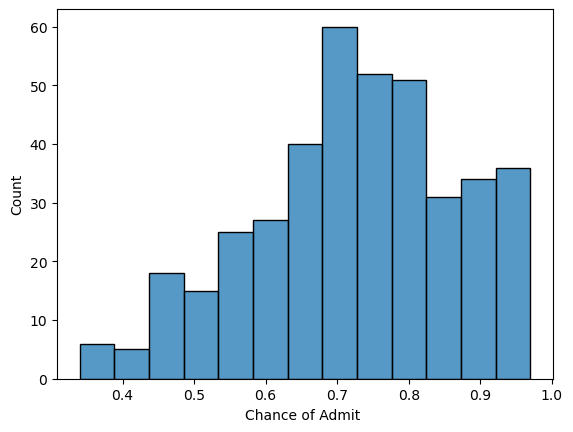

In [13]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.histplot(x=df[i])
        plt.show();

### KDE PLOT

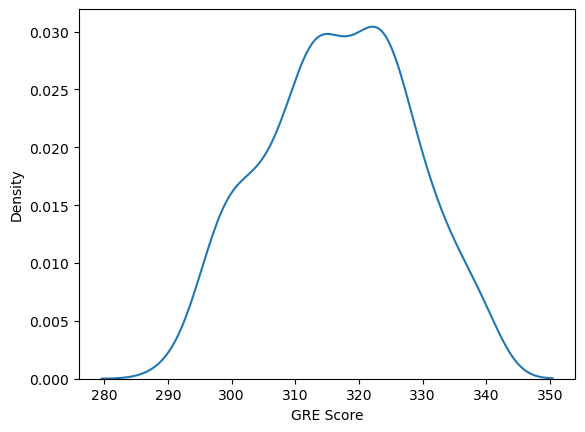

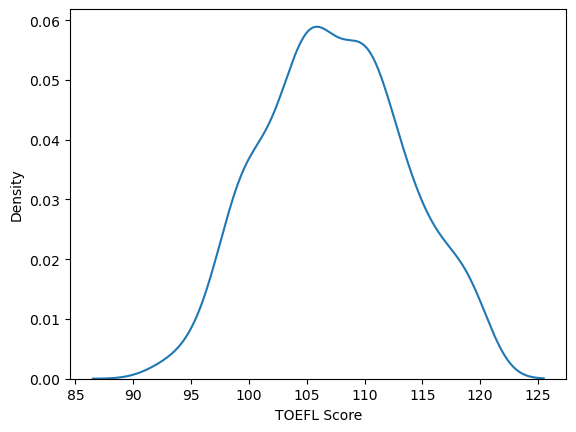

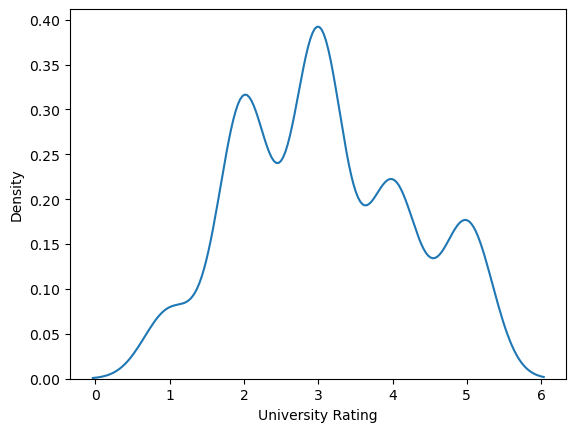

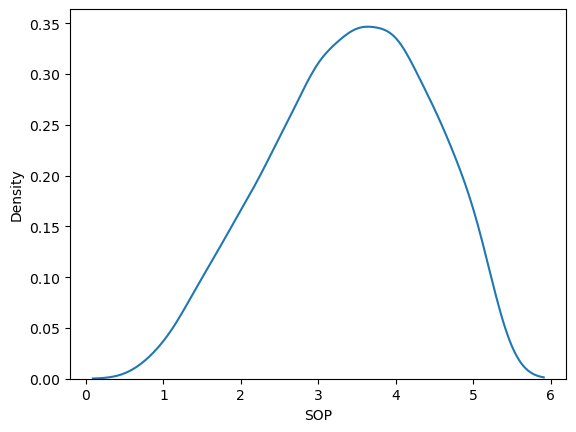

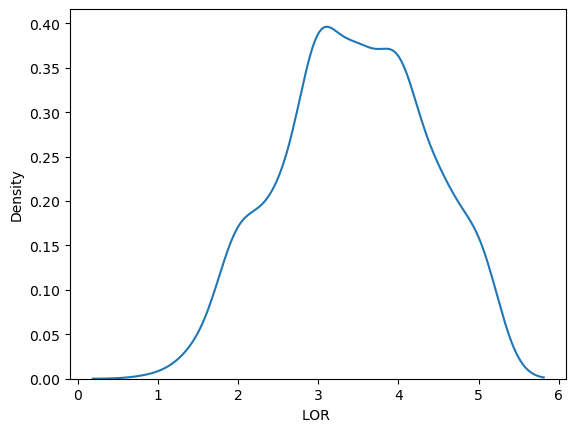

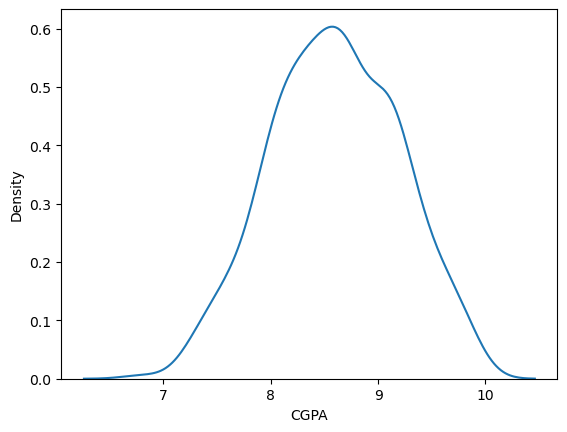

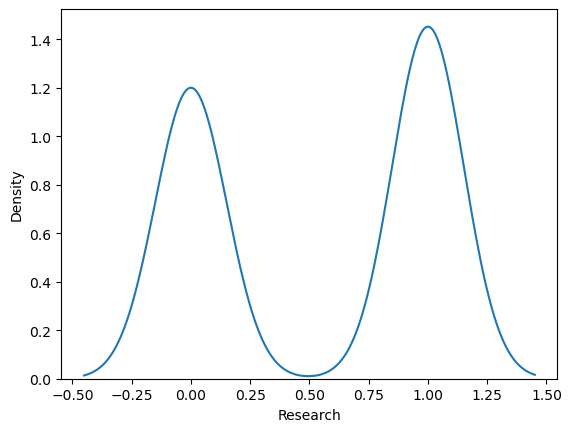

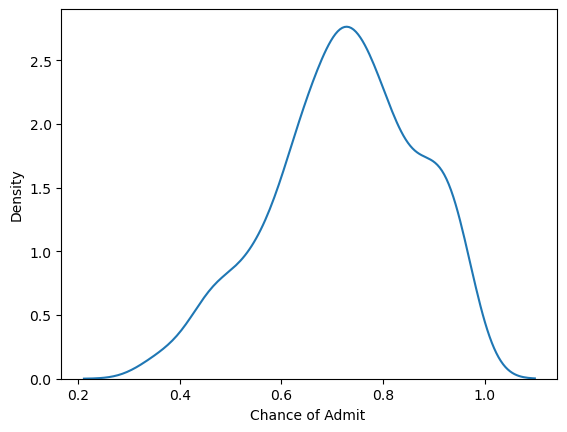

In [14]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.kdeplot(x=df[i])
        plt.show();

### BOXPLOT

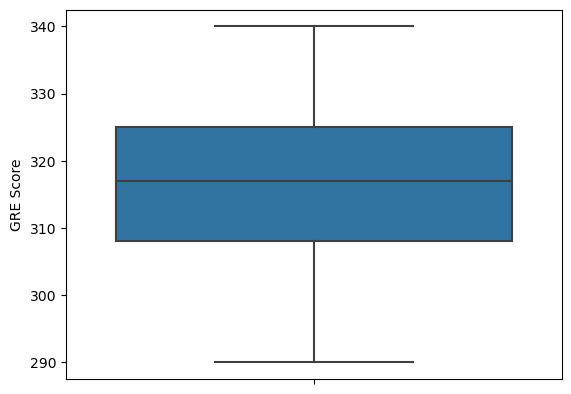

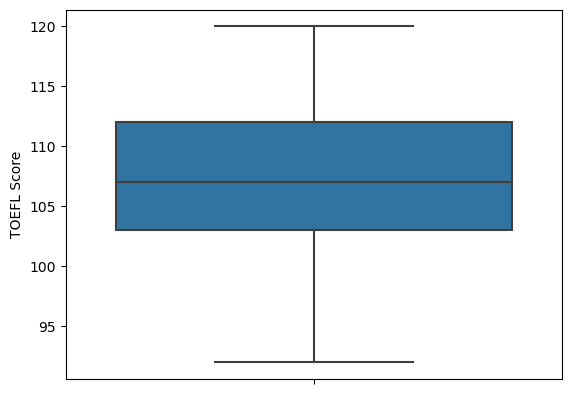

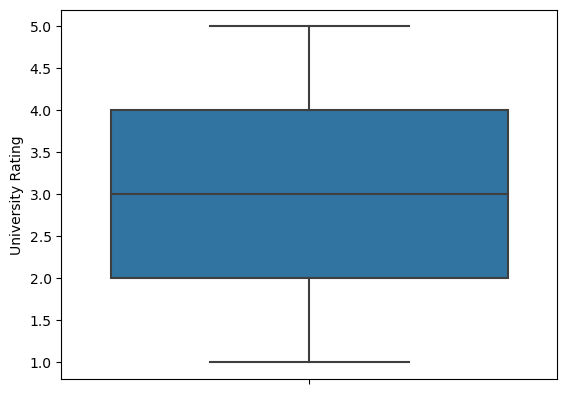

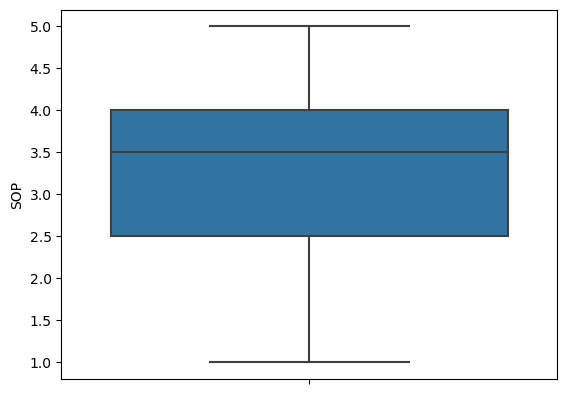

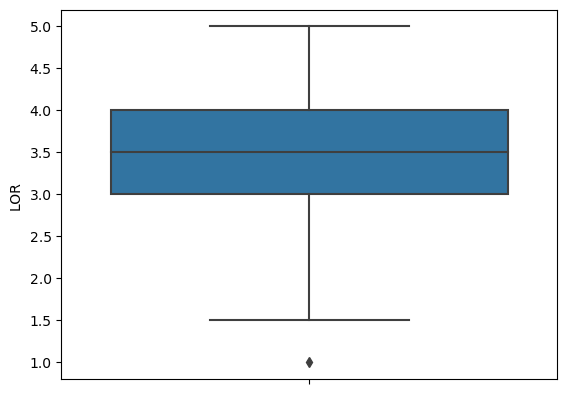

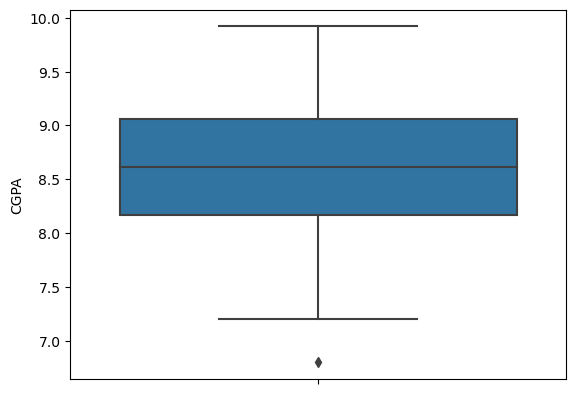

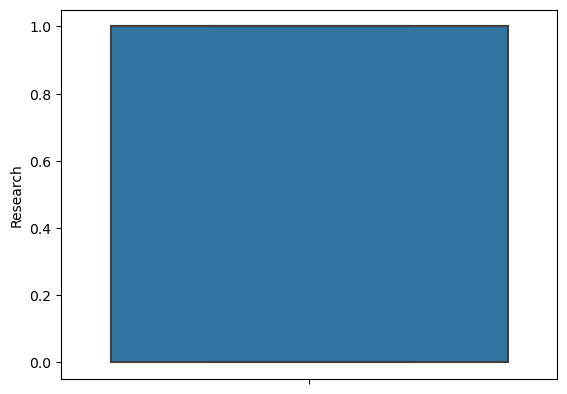

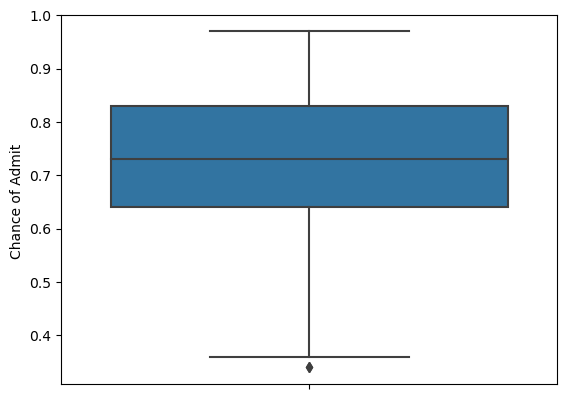

In [15]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i])
        plt.show();

##  MULTIVARIATE ANALYSIS

### BARPLOT

<AxesSubplot:title={'center':'University Rating vs GRE Score'}, xlabel='University Rating', ylabel='GRE Score'>

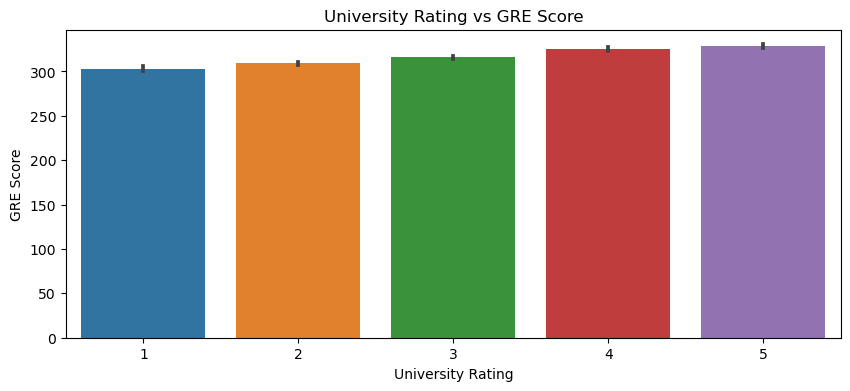

In [16]:
plt.figure(figsize=(10,4))
plt.title('University Rating vs GRE Score')
sns.barplot(x='University Rating', y='GRE Score', data=df)

### PIE CHART

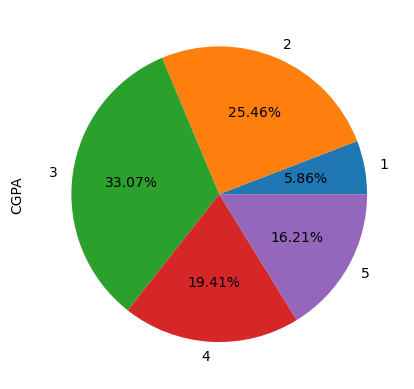

In [17]:
adm = df.groupby(['University Rating'])['CGPA'].sum()
adm.plot.pie(autopct='%1.2f%%');

### LINEPLOT

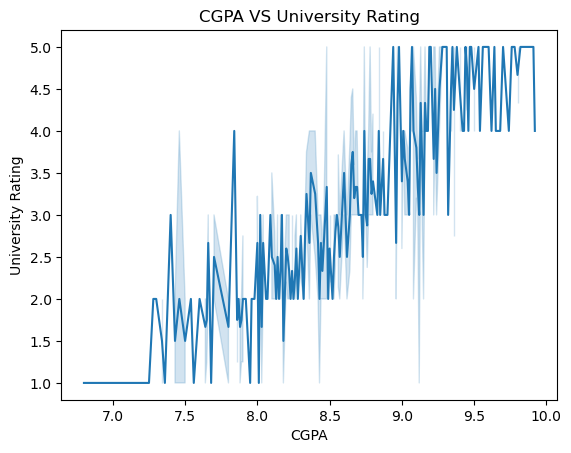

In [18]:
sns.lineplot('CGPA','University Rating',data=df)
plt.title('CGPA VS University Rating')
plt.show();

### PAIR PLOT

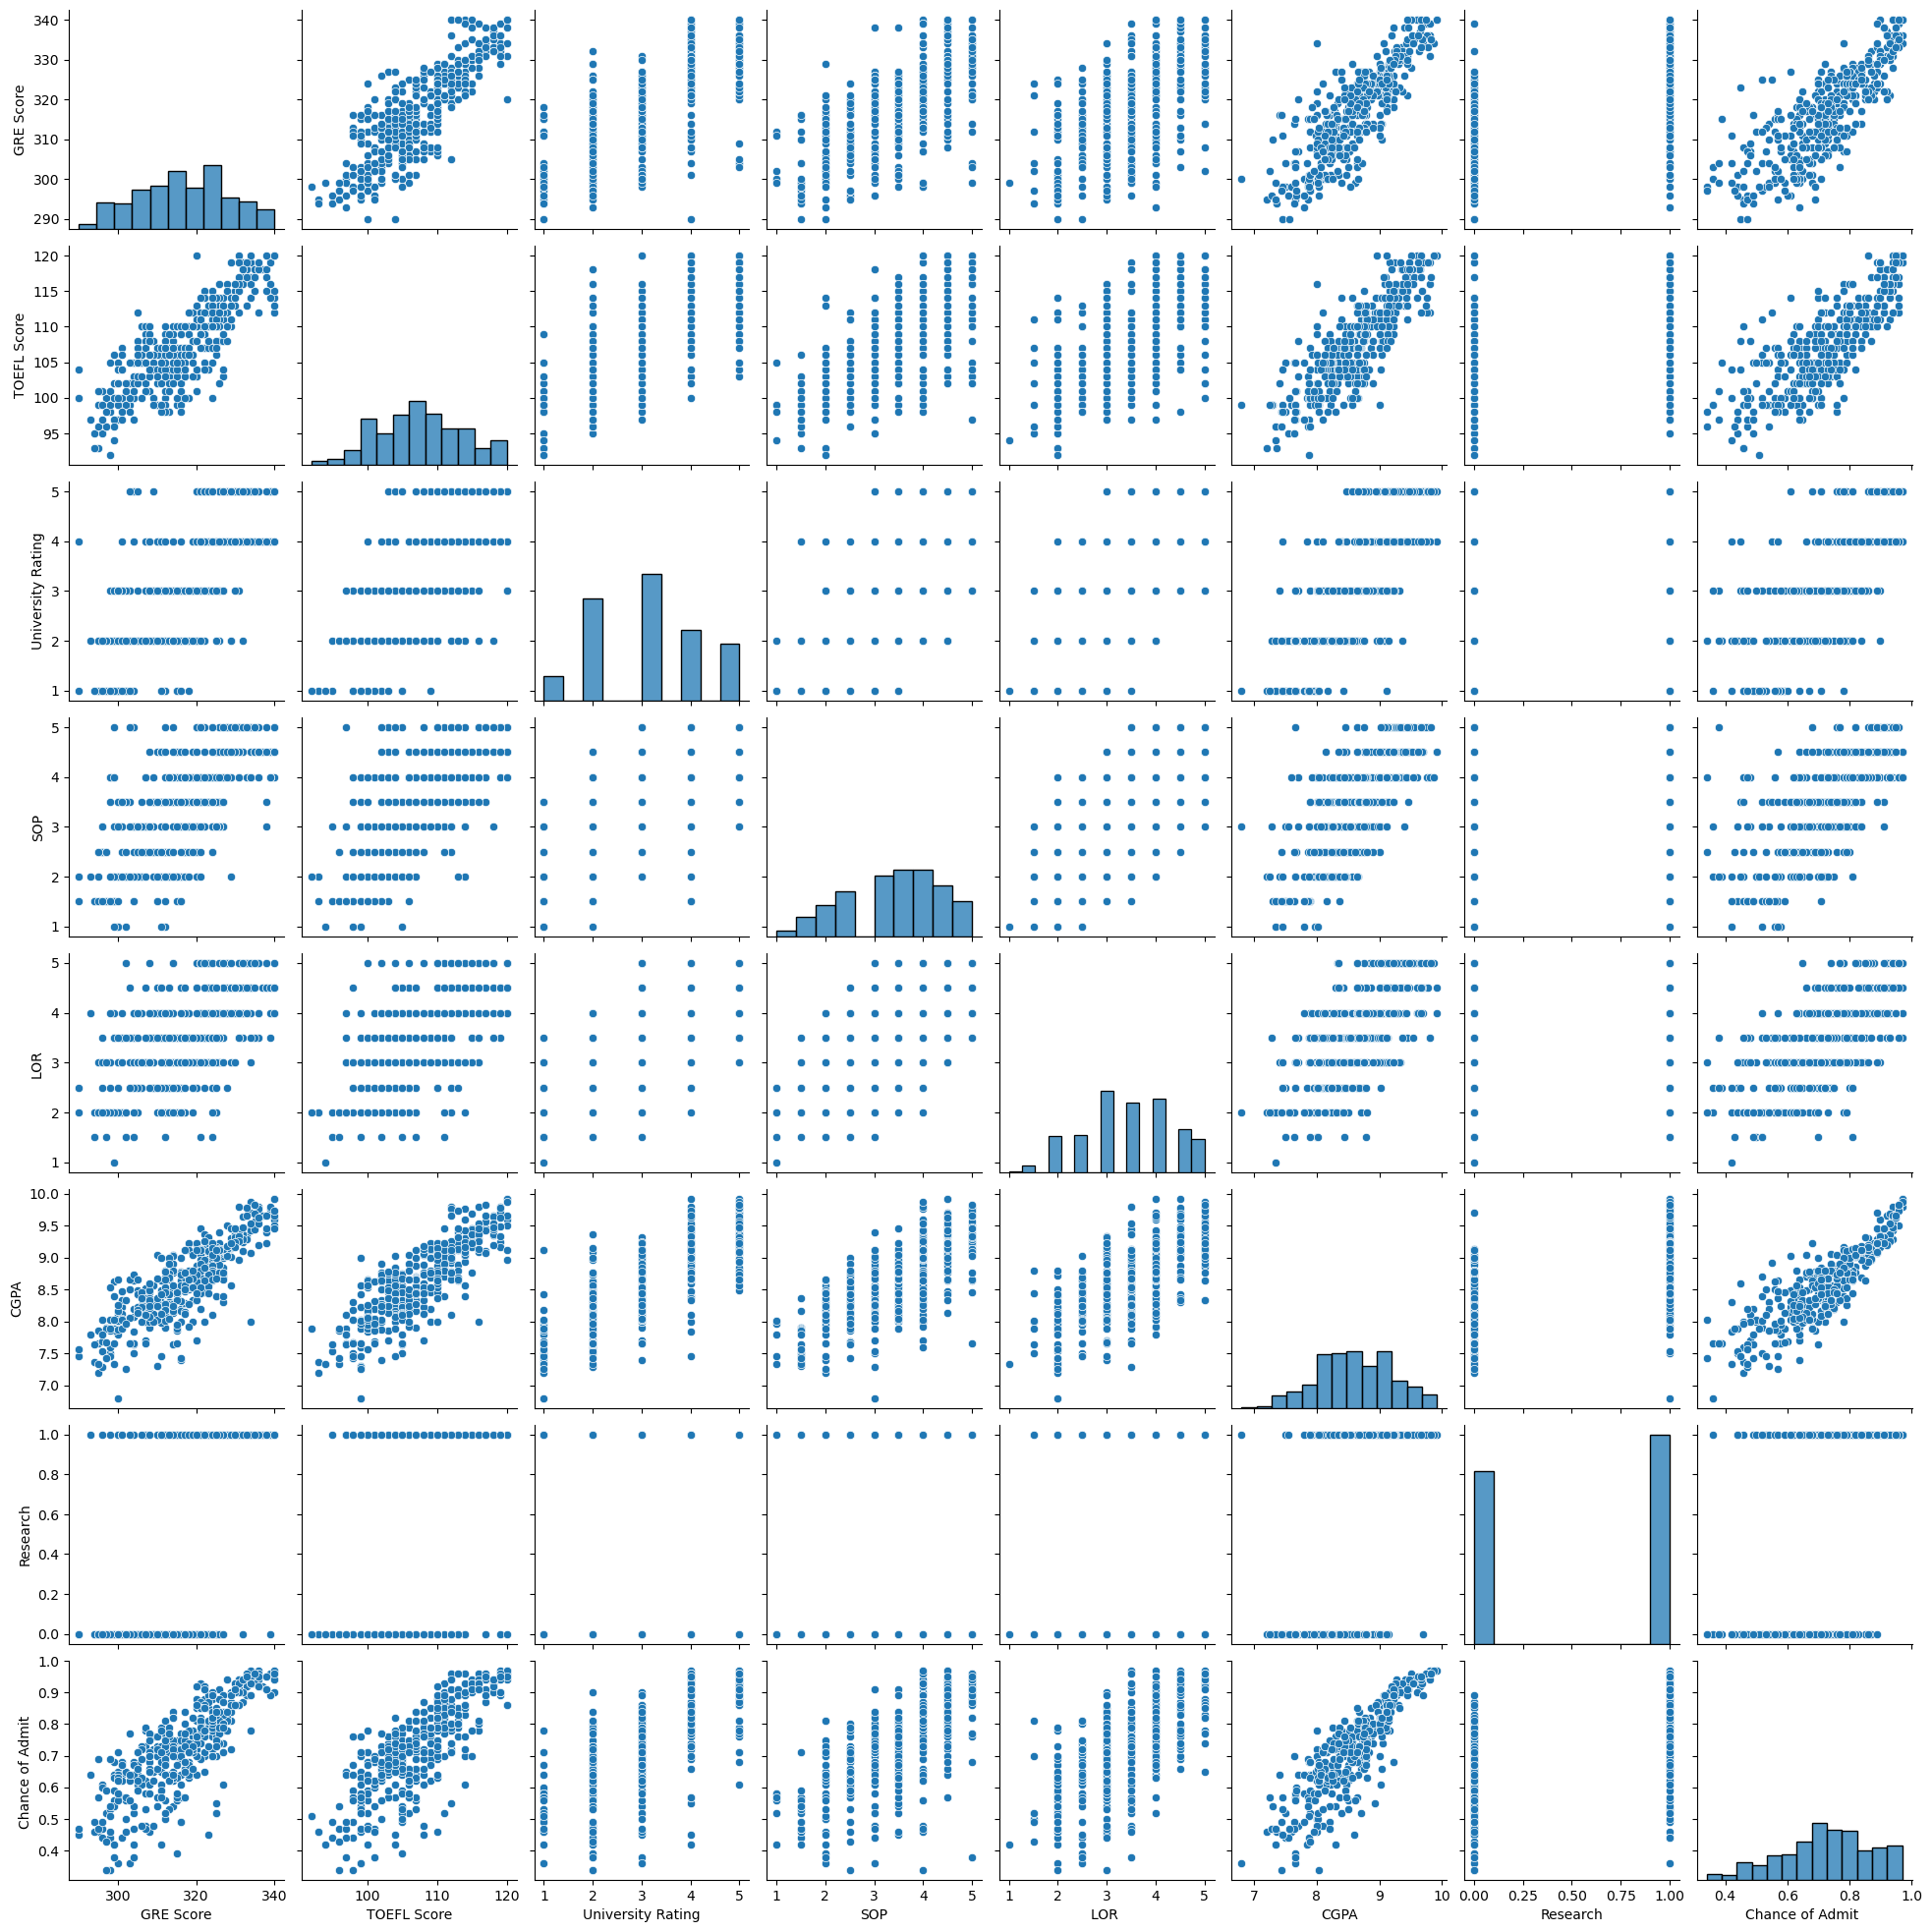

In [19]:
sns.pairplot(df)

## OUTLIER TREATMENT

In [20]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [21]:
for column in df.columns:
    if df[column].dtype!='object':
        UL,LL=outlier_limit(df[column])
        df[column]=np.where((df[column]>UL)|(df[column]<LL),np.nan,df[column])

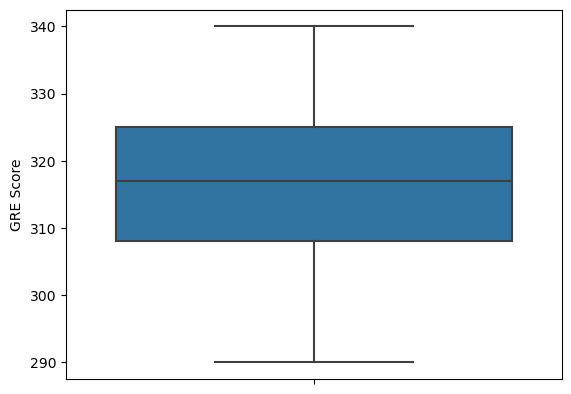

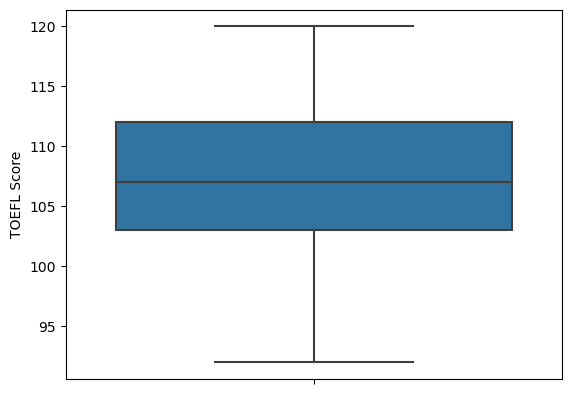

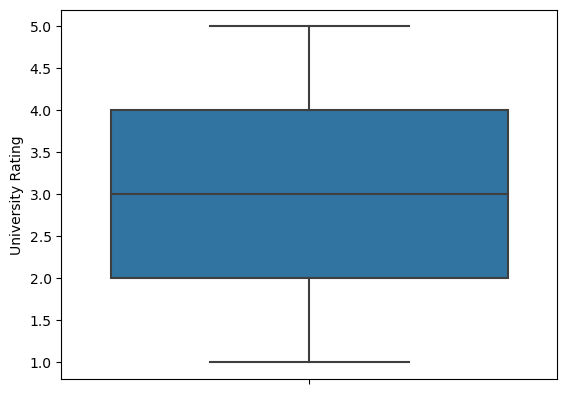

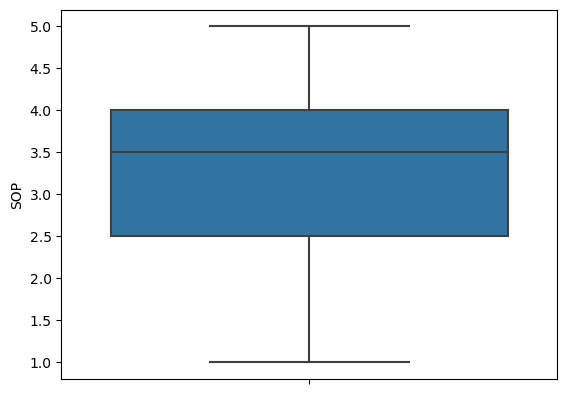

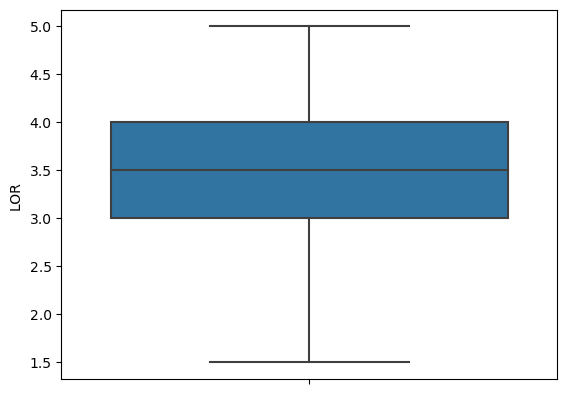

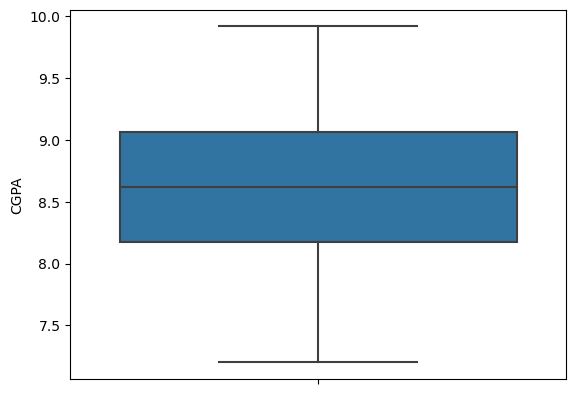

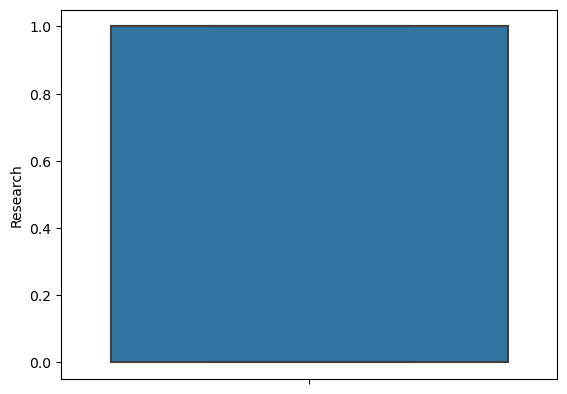

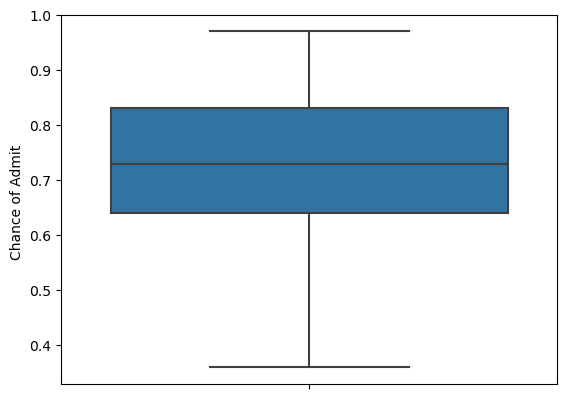

In [22]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i])
        plt.show();

In [23]:
df.dropna(inplace=True)

## CHECKING CORRELATION USING HEATMAP

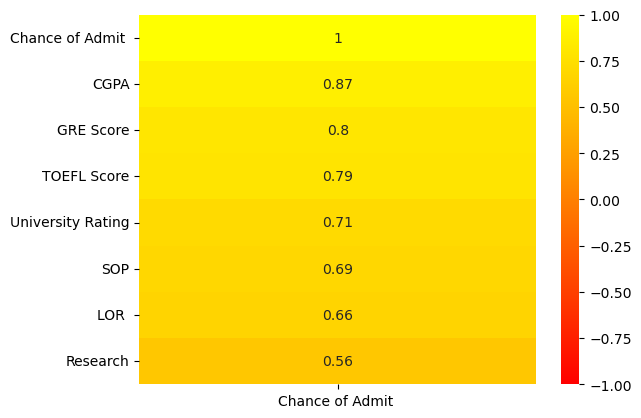

In [24]:
sns.heatmap(df.corr()[['Chance of Admit ']].sort_values(by='Chance of Admit ',ascending=False),vmin=-1,vmax=1,annot=True,cmap="autumn");

## SELECTING X AND Y

In [25]:
x=df[['GRE Score','TOEFL Score','SOP','LOR ','CGPA','Research']].values
y=df[["Chance of Admit "]].values

## SCALING

In [26]:
sc = StandardScaler()
x=sc.fit_transform(x)

## CROSS VALIDATION

In [27]:
models={
'LinearRegression':LinearRegression(),
"Ridge":Ridge(),
"LinearSVR":LinearSVR(),
"DecisionTreeRegressor":DecisionTreeRegressor(),
"GradientBoostingRegressor":GradientBoostingRegressor(),
"AdaBoostRegressor":AdaBoostRegressor(),
"RandomForestRegressor":RandomForestRegressor()
}


In [28]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  0.06109338961036204
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  0.06108936260868223
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  0.060074120384270936
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  0.09372660304752654
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  0.06627597503029653
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  0.07213252397985075
***********************************

## SELECTING MODEL

In [29]:
model=RandomForestRegressor()

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [31]:
model.fit(x_train,y_train)
print('model trained with {}'.format(model))
training_score=model.score(x_train,y_train)*100
testing_score=model.score(x_test,y_test)*100
score=r2_score(y_test,model.predict(x_test))*100
mae=mean_absolute_error(y_test,model.predict(x_test))
mse=mean_squared_error(y_test,model.predict(x_test))
rmse=np.sqrt(mse)
y_pred = model.predict(x)
print("r2score:",score)
print('training_score:',training_score)
print('testing_score:',testing_score)
print('mae:',mae)
print('mse:',mse)
print("rmse_test:",rmse)

model trained with RandomForestRegressor()
r2score: 52.4288326731491
training_score: 97.19512946944602
testing_score: 52.4288326731491
mae: 0.0623
mse: 0.007406525999999997
rmse_test: 0.08606117591574029


## PREDICTING Y

In [32]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,0.92,0.9269
1,0.76,0.8178
2,0.72,0.6835
3,0.80,0.7822
4,0.65,0.6477


## SCATTER PLOT

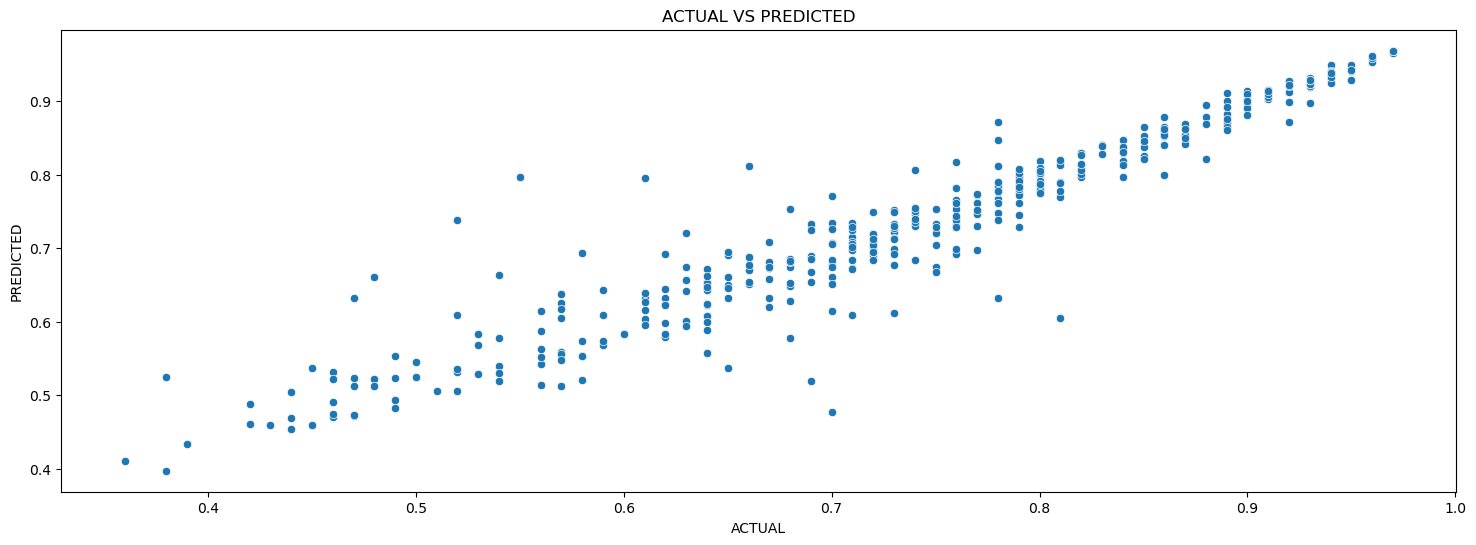

In [33]:
plt.figure(figsize=(18,6))
plt.title('ACTUAL VS PREDICTED')
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");